<a href="https://colab.research.google.com/github/jonathanahc/PLN_Practicas/blob/main/Agrupamiento_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from collections import Counter
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords
import string
import re
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [20]:
nltk.download("stopwords", quiet=True)

True

In [21]:
dataset = fetch_20newsgroups(subset="all", remove=("headers", "footers", "quotes"))
docs_raw = dataset.data

In [22]:
stopword = set(stopwords.words("english"))
punct = str.maketrans("", "", string.punctuation)

In [23]:
def normalize_text (text: str, punct) -> str:
  text = text.lower()
  text = text.translate(punct)
  text = re.sub(r"\s+", " ", text).strip()
  return text

In [24]:
def tokenize (text: str, stopword):
  tokens = simple_preprocess(text, deacc=True, min_len=2, max_len=30)
  tokens = [t for t in tokens if t not in stopword]
  return tokens

In [25]:
docs_tokens = [tokenize(normalize_text(t, punct), stopword) for t in docs_raw]

In [26]:
w2v = Word2Vec(
  sentences=docs_tokens,
  vector_size=100,
  window=5,
  min_count=5,
  workers=4,
  sg=1,
  negative=10,
  epochs=10,
  seed=42
)

# **Clustering con KMeans**

In [35]:
X = normalize(w2v.wv.vectors, norm="l2", axis=1)

kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
kmeans.fit(X)

for i, label in enumerate(kmeans.labels_):
  print(f"Documento {i}: Clúster {label}")

Documento 0: Clúster 2
Documento 1: Clúster 2
Documento 2: Clúster 2
Documento 3: Clúster 2
Documento 4: Clúster 2
Documento 5: Clúster 2
Documento 6: Clúster 2
Documento 7: Clúster 18
Documento 8: Clúster 18
Documento 9: Clúster 2
Documento 10: Clúster 2
Documento 11: Clúster 2
Documento 12: Clúster 2
Documento 13: Clúster 2
Documento 14: Clúster 0
Documento 15: Clúster 18
Documento 16: Clúster 0
Documento 17: Clúster 2
Documento 18: Clúster 2
Documento 19: Clúster 2
Documento 20: Clúster 2
Documento 21: Clúster 2
Documento 22: Clúster 18
Documento 23: Clúster 18
Documento 24: Clúster 2
Documento 25: Clúster 2
Documento 26: Clúster 18
Documento 27: Clúster 18
Documento 28: Clúster 2
Documento 29: Clúster 10
Documento 30: Clúster 2
Documento 31: Clúster 2
Documento 32: Clúster 12
Documento 33: Clúster 2
Documento 34: Clúster 18
Documento 35: Clúster 15
Documento 36: Clúster 18
Documento 37: Clúster 18
Documento 38: Clúster 18
Documento 39: Clúster 2
Documento 40: Clúster 2
Documento 41

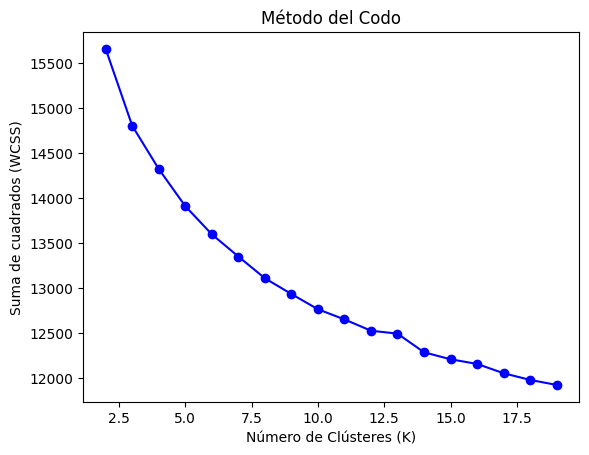

In [37]:
wcss = []
K = range(2, 20)

for k in K:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bo-')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Suma de cuadrados (WCSS)')
plt.title('Método del Codo')
plt.show()

In [40]:
sil_scores = []

for k in range(2, 20):
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(X)
  score = silhouette_score(X, labels)
  sil_scores.append(score)
  print(f"K={k}, Silhouette={round(score, 3)}")

K=2, Silhouette=0.07100000232458115
K=3, Silhouette=0.0729999989271164
K=4, Silhouette=0.06199999898672104
K=5, Silhouette=0.06800000369548798
K=6, Silhouette=0.06599999964237213
K=7, Silhouette=0.06700000166893005
K=8, Silhouette=0.0689999982714653
K=9, Silhouette=0.06800000369548798
K=10, Silhouette=0.06800000369548798
K=11, Silhouette=0.06800000369548798
K=12, Silhouette=0.06800000369548798
K=13, Silhouette=0.06400000303983688
K=14, Silhouette=0.06300000101327896
K=15, Silhouette=0.06599999964237213
K=16, Silhouette=0.061000000685453415
K=17, Silhouette=0.06499999761581421
K=18, Silhouette=0.06400000303983688
K=19, Silhouette=0.05999999865889549


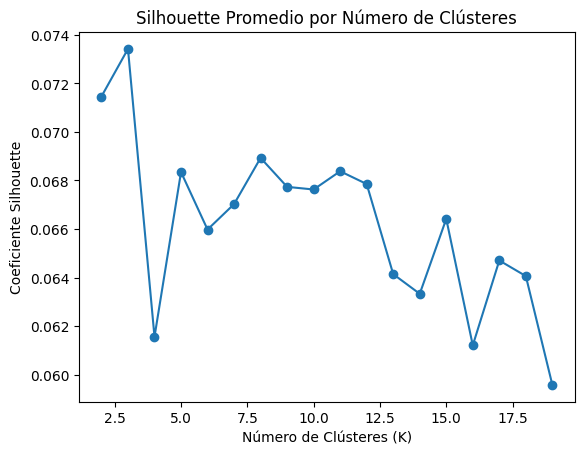

In [41]:
plt.plot(range(2, 20), sil_scores, marker='o')
plt.xlabel("Número de Clústeres (K)")
plt.ylabel("Coeficiente Silhouette")
plt.title("Silhouette Promedio por Número de Clústeres")
plt.show()

In [56]:
results_kmeans = []

for k in range(2, 20):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  labels = kmeans.fit_predict(X)
  sil = silhouette_score(X, labels)
  dbi = davies_bouldin_score(X, labels)
  ch = calinski_harabasz_score(X, labels)
  results_kmeans.append([k, sil, dbi, ch])

df_results_kmeans = pd.DataFrame(results_kmeans, columns=["K","Silhouette","DBI","CH"])
df_results_kmeans

,K,Silhouette,DBI,CH
0,2,0.071454,3.607995,1960.364624
1,3,0.073371,3.226331,1791.334351
2,4,0.070002,3.350015,1526.716309
3,5,0.068324,3.113557,1372.910522
4,6,0.065922,3.172532,1243.921265
5,7,0.067032,3.094360,1139.112671
6,8,0.068893,3.070015,1060.860107
7,9,0.067638,3.132466,985.562500
8,10,0.067792,3.144326,925.770569
9,11,0.068222,3.110403,871.400452


# **Clustering con DBSCAN**

In [50]:
eps_values = [0.3, 0.5, 0.7, 0.9]
min_samples_values = [3, 5, 7, 10]

results = []

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s, metric='cosine')
        labels = db.fit_predict(X)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            sil = silhouette_score(X, labels, metric='cosine')
            dbs = davies_bouldin_score(X, labels)
            chs = calinski_harabasz_score(X, labels)
        else:
            sil, dbs, chs = np.nan, np.nan, np.nan

        results.append((eps, min_s, n_clusters, n_noise, sil, dbs, chs))

In [51]:
df_results = pd.DataFrame(
    results,
    columns=['eps', 'min_samples', 'clusters', 'ruido', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']
)

In [53]:
df_results

,eps,min_samples,clusters,ruido,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,0.3,3,12,3267,-0.073023,2.919538,16.986717
1,0.3,5,5,3368,-0.023526,4.109756,37.575394
2,0.3,7,1,3429,NaN,NaN,NaN
3,0.3,10,1,3474,NaN,NaN,NaN
4,0.5,3,1,0,NaN,NaN,NaN
5,0.5,5,1,0,NaN,NaN,NaN
6,0.5,7,1,0,NaN,NaN,NaN
7,0.5,10,1,0,NaN,NaN,NaN
8,0.7,3,1,0,NaN,NaN,NaN
9,0.7,5,1,0,NaN,NaN,NaN


# **Comparación de resultados**

In [58]:
print("KMeans Results:")
display(df_results_kmeans)

print("\nDBSCAN Results:")
df_results_dbscan_comp = df_results[['eps', 'min_samples', 'clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']]
display(df_results_dbscan_comp)

KMeans Results:


,K,Silhouette,DBI,CH
0,2,0.071454,3.607995,1960.364624
1,3,0.073371,3.226331,1791.334351
2,4,0.070002,3.350015,1526.716309
3,5,0.068324,3.113557,1372.910522
4,6,0.065922,3.172532,1243.921265
5,7,0.067032,3.094360,1139.112671
6,8,0.068893,3.070015,1060.860107
7,9,0.067638,3.132466,985.562500
8,10,0.067792,3.144326,925.770569
9,11,0.068222,3.110403,871.400452



DBSCAN Results:


,eps,min_samples,clusters,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,0.3,3,12,-0.073023,2.919538,16.986717
1,0.3,5,5,-0.023526,4.109756,37.575394
2,0.3,7,1,NaN,NaN,NaN
3,0.3,10,1,NaN,NaN,NaN
4,0.5,3,1,NaN,NaN,NaN
5,0.5,5,1,NaN,NaN,NaN
6,0.5,7,1,NaN,NaN,NaN
7,0.5,10,1,NaN,NaN,NaN
8,0.7,3,1,NaN,NaN,NaN
9,0.7,5,1,NaN,NaN,NaN


# **Visualizaciones**

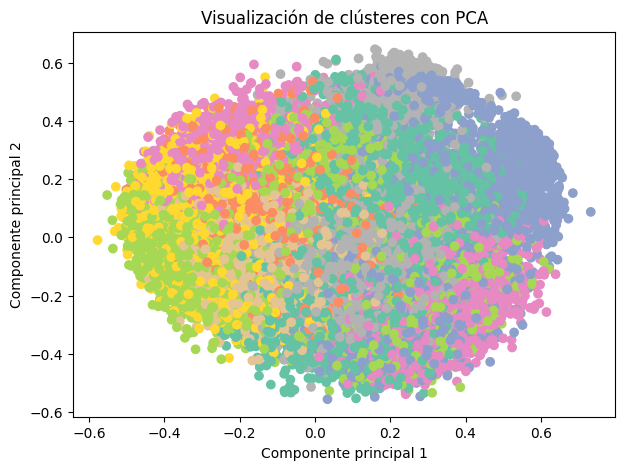

In [61]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='Set2')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Visualización de clústeres con PCA')
plt.show()

/tmp/ipython-input-631722749.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


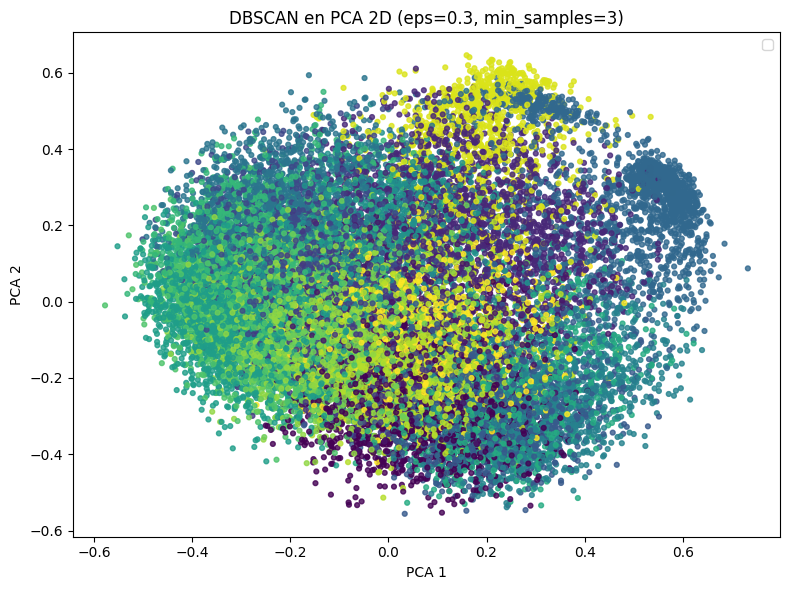

In [63]:
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

plt.figure(figsize=(8,6))
mask_clusters = labels != -1
plt.scatter(X2[mask_clusters, 0], X2[mask_clusters, 1],
            c=labels[mask_clusters], s=12, alpha=0.8)

mask_noise = ~mask_clusters
if mask_noise.any():
    plt.scatter(X2[mask_noise, 0], X2[mask_noise, 1],
                s=14, alpha=0.8, marker='x', label='Ruido (-1)')

plt.title(f"DBSCAN en PCA 2D (eps={0.3}, min_samples={3})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(loc="best")
plt.tight_layout()
plt.show()